# Object-oriented Programming (I)
##  Why OOP?
Code reuse
- by supporting inheritance

Encapsulation
- Wrapping up implementation details behind object interfaces 

Structure
- Classes provide new local scopes, which minimizes name clashes

Maintenance
- usually only one copy of the code needs to be changed

Consistency 
- Classes and inheritance allow you to implement common interfaces

Polymorphism
- makes code more flexible and widely applicable, and hence more reusable

#### 참고: Name Spaces and Scopes

Assignment statement의 의미: `X = 11`
- X가 name space에 존재하지 않으면 X라는 name을 create하고 `11`이라는 object를 reference
- 존재하면, X라는 name이 새로운 object `11`을 reference

Name space: 이름이 정의되는 공간. dir()로 현재 name space에 있는 name들, 즉 symbol table을 볼 수 있다.

A **scope** refers to a region of a program from where a namespace can be accessed without a prefix.

#### Functions as operations on data (I)
주어진 data에 대해 적용되는 operation을 정의할 수 있다. 예를 들어 2 차원 좌표를 갖는 point에 대해 다음과 같은 operation을 function으로 정의할 수 있다.
```Python
Point_x = 0
Point_y = 0

def set_pos(x, y):
    global Point_x, Point_y
    Point_x = x
    Point_y = y

def display():
    global Point_x, Point_y
    print("x={0}, y={1}".format(Point_x, Point_y))
    
def distance_from_origin():
    global Point_x, Point_y
    return (Point_x **2 + Point_y ** 2) ** 0.5
    
set_pos(4, 5)
display()
print(distance_from_origin())

set_pos(3.2, -5)
display()
print(distance_from_origin())
```

#### Functions as operations on data II
위 operation은 한 벌의 Point data에만 operation이 적용된다.

여러 개의 point들에 대해 같은 operation을 적용하려면, 항상 point data를 parameter로 pass해야 한다.

In [ ]:
def Point():
    """Create a point represented by a list of length 2"""
    return [0, 0]    

def set_pos(p, x, y):
    p[0] = x
    p[1] = y

def display(p):
    print("x={0}, y={1}".format(p[0], p[1]))
    
def distance(p, q):
    """distance between Point p and q"""
    return ((p[0] - q[0])**2 + (p[1] - q[1])**2) ** 0.5
    
p1 = Point()
set_pos(p1, 4, 5)
display(p1)
print(distance(p1, [0, 0]))

p2 = Point()
set_pos(p2, 3.2, -5)
display(p2)
print(distance(p1, p2))

## Classes: encapsulate data and its operation. 
Class는 내부에 data(**attribute**이라 한다)와 function을 포함하고 있으며 이들을 외부와 구별되게 encapulation한다. 이때, class 내에 정의된 function을 **method**라 부른다. 
Method는 반드시 class나 class instance(class라는 틀에서 생성되는 object)를 지칭하며 call되고, 내부 상태(data)를 수정할 수 있다.

>참고:
>- Python은 data를 완전히 숨기지 않는다. 다시 말해, C나 Java와 달리 class 내의 이름을 *private*로 완전히 가리는 수단은 없다는 뜻이다.
>- 만일, class 밖으로 노출하고 싶지 않은 경우, '_' 또는 '__' 로 시작하는 이름을 지어라.

In [ ]:
class Point:
    x = 0      # class attributes
    y = 0      

    def set_pos(x, y):
        Point.x = x
        Point.y = y

    def display():
        print("x={0}, y={1}".format(Point.x, Point.y))

    def distance_from_origin():
        return (Point.x **2 + Point.y ** 2) ** 0.5

Point.x = 4
Point.y = 5
Point.display()
print(Point.distance_from_origin())

Point.set_pos(3.2, -5)
Point.display()
print(Point.distance_from_origin())

## Class Instances
**Class objects** provide default behavior and serve as factories for instance objects

**Instance objects** are the real objects your programs process—each is a namespace in its own right, but inherits 

> `Point.set_pos(p, 4, 5)` is equivalent to `p.set_pos(4, 5)`

> Preferred notation is *obj.attr* or *obj.method()*.

In [ ]:
class Point:
    def set_pos(self, x, y):
        self.x = x
        self.y = y
    
    def display(self):
        return "({0}, {1})".format(self.x, self.y)

    def distance(self, q):
        """distance from self to other point q"""
        return ((self.x - q.x)**2 + (self.y - q.y)**2) ** 0.5

p1 = Point()      # a Point class instance
p1.set_pos(4, 5)  # Runs: Point.set_pos(p1, 4, 5)

p2 = Point()      # a Point class instance
p2.set_pos(3.2, -5)

print("Distance between {0} and {1} is".format(p1.to_string(), p2.to_string()))
print(p1.distance(p2))

### Rewriting using
#### constructor(initializer) `__init__`
`p = Point(x, y)`
- shall create a Point class instance 
- then automatically calls `Point.__init__(p, x, y)`
- returns reference of the instance `p`

####  pre-defined special method name `__str__`
`str(`object`)` calls object.`__str__()`

In [ ]:
class Point:    
    """2D Point class"""
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({0}, {1})".format(self.x, self.y)

#     def __repr__(self):
#         return "Point({0}, {1})".format(self.x, self.y)

    def distance(self, other):
        return ((self.x - other.x)**2 + (self.y - other.y)**2) ** 0.5

p1 = Point()       # a Point class instance
p2 = Point(3.2, -5)    # a Point class instance

print(p1)
print("Distance between {0} and {1} is".format(p1, p2))
print(p1.distance(p2))

In [ ]:
str(p1)     # print calls str. str calls __str__

In [ ]:
p1          # calls repr(p1)

**str()**: convert into string
> `print(obj)` or `format(obj)` ==> `str(obj)` ==> `obj.__str__()`

**repr()**: "official" string representation of an object that could be used to recreate the object
> `>>> obj` or `repr(obj)` ==> `obj.__repr__()`

> If `__str__()` method is not defined, `str(obj)` ==> `__repr__()`

In [ ]:
p3 = eval('Point(3, 4)')   # Point(3, 4)
p3.distance(p1)

### Instance as return values
새로운 value가 return된다는 말은 새로운 class instance를 생성해서 return하는 것이다.

Function implementation:

In [ ]:
def midpoint(p1, p2):
    """ Return the midpoint of points p1 and p2 """
    mx = (p1.x + p2.x)/2
    my = (p1.y + p2.y)/2
    return Point(mx, my)

p = Point(3, 4)
q = Point(5, 12)
r = midpoint(p, q)
print(r)

Method implementation: 당연히 class 내에 정의하는 편이 바람직

In [ ]:
class Point:    
    """2D Point class"""
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __repr__(self):
        return "Point({0}, {1})".format(self.x, self.y)

    def distance(self, other):
        return ((self.x - other.x)**2 + (self.y - other.y)**2) ** 0.5
    
    def midpoint(self, other):
        """ Return the midpoint of points p1 and p2 """
        mx = (self.x + other.x)/2
        my = (self.y + other.y)/2
        return Point(mx, my)

mid_p = Point(3,4).midpoint(Point(5, 12))
mid_p

### Equality: 같은 좌표인가?

In [ ]:
p1 = Point(3, 4)
p2 = Point(3, 4)
print(id(p1), id(p2))
print(p1 is p2)  # refer to the same object?
print(p1 == p2)  # equlality not defined in Point class

p1과 p2는 좌표는 같지만 다른 Point instance(즉, object)를 가리키고 있다.
두 object내의 attribute x와 y의 값, 즉 좌표가 같으면 `p1 == p2`가 `True`가 되도록 `__eq__` magic method를 추가 해 보자.

### Composite objects
Rectangle class의 corner, width, height attribute를 가지며, corner는 Point object로 표현할 수 있다. Object attribute로서 다른 class instance를 갖는 object을 composite object라 한다.

In [ ]:
class Rectangle:
    """ A class to manufacture rectangle objects """

    def __init__(self, posn, w, h):
        """ Initialize rectangle at Point posn, with width w, height h """
        self.corner = posn
        self.width = w
        self.height = h

    def __str__(self):
        return  "({0}, {1}, {2})".format(
            self.corner, self.width, self.height)
    
    def __repr__(self):
        return  "Rectangle({0}, {1}, {2})".format(
            repr(self.corner), self.width, self.height)
    
    def grow(self, delta_width, delta_height):
        """ Grow (or shrink) this object by the deltas """
        self.width += delta_width
        self.height += delta_height

    def move(self, dx, dy):
        """ Move this object by the deltas """
        self.corner.x += dx
        self.corner.y += dy

box = Rectangle(Point(0, 0), 100, 200)
bomb = Rectangle(Point(100, 80), 5, 10)    # In my video game
print("box: ", box)
bomb

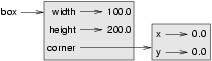

In [ ]:
r = Rectangle(Point(10,5), 100, 50)
print(r)
r.grow(25, -10)
print(r)
r.move(-10, 10)
print(r)

### Copying objects

Rename

In [ ]:
b1 = Rectangle(Point(0, 0), 100, 200)
a = b1
a is b1

To get shallow copy
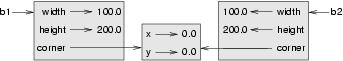

In [ ]:
import copy
b2 = copy.copy(b1)
b1.corner is b2.corner

To get a deep copy:
- b1 and b3 are completely separate objects.

In [ ]:
b3 = copy.deepcopy(b1)
b1.corner is b3.corner

## Employee class

In [ ]:
class Employee:
    def __init__(self, name, pay, job=None):
        self.name = name
        self.pay = pay
        self.job = job
        
    def lastName(self):
        return self.name.split()[-1]
    
    def giveRaise(self, percent):
        self.pay *= (1.0 + percent)
        
    def __repr__(self):
        return f'Employee({self.name}, {self.pay}, {self.job})'

if __name__ == '__main__':
    bob = Employee('Bob Smith', 30000)
    sue = Employee('Sue Jones', 40000, 'dev')
    print(bob)
    print(bob.lastName())
    sue.giveRaise(0.1)
    print(sue)

## Inheritance - Subclassing
#### Inheritance:
Super class의 attribute나 method들은 subclass로상속된다. (정의할 필요없이 super class의 것이 **reuse** 된다.)

**is-a** relationship: 
> *Manager is an Employee.*
#### Override:
Super class와 같은 이름의 method를 정의할 수 있다. 그러면, super class의 method는현재 정의한 method로 override 된다. 즉, super class의 method는 보이지 않고, 현재 class의 method가 유효하다.

In [ ]:
class Manager(Employee):
    def __init__(self, name, pay):
        Employee.__init__(self, name, pay, 'manager')
        # equivalently,
        # super().__init__(name, pay, 'manager')
    
    # override Employee's method
    def giveRaise(self, percent, bonus=0.1):
        self.pay *= (1.0 + percent + bonus)

if __name__ == '__main__':
    tom = Manager(name='Tom Doe', pay=50000)
    tom.giveRaise(0.1)
    print(tom.lastName())    # super's
    print(tom)               # super's __repr__

Q. super class name으로 tom object가 print되었다. 제대로 수정하라.

## Composition - embedding objects
다른 class object들을 가지고 새로운 object(composite object)를 구성할 수 있다.
Attribute에 다른 object들을 포함하고 있다.

**has-a** relationship: 
>*Department has Employees and Managers.*

In [ ]:
class Department:
    def __init__(self, *args):
        self.members = list(args)
        
    def addMember(self, employee):
        self.members.append(employee)
        
    def giveRaise(self, percent):
        for employee in self.members:
            employee.giveRaise(percent)
    
    def showAll(self):
        for employee in self.members:
            print(employee)

if __name__ == '__main__':
    bob = Employee('Bob Smith', 30000, 'dev')
    sue = Employee('Sue Jones', 40000, 'dev')
    tom = Manager(name='Tom Doe', pay=50000)

    development = Department(bob, sue)
    development.addMember(tom)
    development.giveRaise(.10)
    development.showAll()

Q. Develoment department에 임금 10%를 올렸다. Manage인 tom에게는 몇 % 상승했나? bob, sue, tom에게 적용된 `giveRaise` method는?

Q. showAll method에서 bob, sue, tom에게 적용된 `__repr__` method는?